<a href="https://colab.research.google.com/github/mashuai191/machine_learning/blob/master/computer_vision/pantograph_mrcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
print (os.getcwd())
print(os.listdir("./gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5"))
!unzip ./gdrive/"My Drive"/App/machine_learning/cv/shanghaidianqi_line5/pantograph.zip

/content
['pantograph.zip', 'pantograph mrcnn.ipynb']
Archive:  ./gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/pantograph.zip
  inflating: train/10 (2).jpg        
  inflating: train/10.jpg            
  inflating: train/100 (2).jpg       
  inflating: train/100.jpg           
  inflating: train/110 (2).jpg       
  inflating: train/110.jpg           
  inflating: train/120 (2).jpg       
  inflating: train/120.jpg           
  inflating: train/130 (2).jpg       
  inflating: train/130.jpg           
  inflating: train/140 (2).jpg       
  inflating: train/140.jpg           
  inflating: train/150 (2).jpg       
  inflating: train/150.jpg           
  inflating: train/160 (2).jpg       
  inflating: train/160.jpg           
  inflating: train/170 (2).jpg       
  inflating: train/170.jpg           
  inflating: train/180 (2).jpg       
  inflating: train/180.jpg           
  inflating: train/190 (2).jpg       
  inflating: train/190.jpg           
  inflating: train/20 

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./.config/.last_survey_prompt.yaml
./.config/active_config
./.config/config_sentinel
./.config/.last_update_check.json
./.config/gce
./.config/.metricsUUID
./.config/configurations/config_default
./.config/logs/2019.11.21/16.30.08.750872.log
./.config/logs/2019.11.21/16.30.13.462641.log
./.config/logs/2019.11.21/16.30.12.417886.log
./.config/logs/2019.11.21/16.29.53.017170.log
./.config/logs/2019.11.21/16.29.57.949151.log
./val/via_region_data.json
./val/780.jpg
./val/val_10.csv
./val/730.jpg
./val/760.jpg
./val/740.jpg
./val/790 (2).jpg
./val/770 (2).jpg
./val/730 (2).jpg
./val/740 (2).jpg
./val/800.jpg
./val/760 (2).jpg
./train/210.jpg
./train/120 (2).jpg
./train/160.jpg
./train/500.jpg
./train/270.jpg
./train/430.jpg
./train/120.jpg
./train/280 (2).jpg
./train/230 (2).jpg
./train/670 (2).jpg
./train/690.jpg
./train/270 (2).jpg
./train/490.jpg
./train/250 (2).jpg
./train/680.jpg
./train/220 (2).jpg
./train/via_region_data.json
./train/100 (2).jpg
./train/140.jpg
./train/100.jpg
./tra

In [4]:
from IPython.display import clear_output
!git clone https://github.com/matterport/Mask_RCNN.git # load Mask R-CNN code implementation
#!git clone https://github.com/mashuai191/Mask_RCNN.git
#!git clone https://github.com/ruslan-kl/brain-tumor.git # load new data set and annotations 
!pip install tensorflow==1.14
!pip install Keras==2.2.5
!pip install pycocotools

#!rm -rf brain-tumor/.git/
!rm -rf Mask_RCNN/.git/
!rm -rf Mask_RCNN/images
!rm -rf Mask_RCNN/assets

#clear_output()

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.81 MiB | 37.42 MiB/s, done.
Resolving deltas: 100% (570/570), done.
     |████████████████████████████████| 109.2MB 21kB/s 
     |████████████████████████████████| 3.2MB 43.3MB/s 
     |████████████████████████████████| 491kB 54.7MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [5]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'   



# Root directory of the project
#ROOT_DIR = os.path.abspath("../../")
ROOT_DIR = os.path.abspath('Mask_RCNN/')

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

from mrcnn import utils
from mrcnn.config import Config
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.balloon import balloon

%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [6]:
class PantographConfig(Config):
    """Configuration for training on the brain tumor dataset.
    """
    # Give the configuration a recognizable name
    NAME = 'pantograph'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2
    NUM_CLASSES = 1 + 1  # background + pantograph
    DETECTION_MIN_CONFIDENCE = 0.9    
    STEPS_PER_EPOCH = 50
    MINI_MASK_SHAPE = (112,224)
    USE_MINI_MASK = True
    TRAIN_ROIS_PER_IMAGE = 56
    #IMAGE_RESIZE_MODE = 'crop'
    IMAGE_MAX_DIM = 960
    #LOSS_WEIGHTS = {
    #    "rpn_class_loss": 1.,
    #    "rpn_bbox_loss": 1.,
    #    "mrcnn_class_loss": 1.,
    #    "mrcnn_bbox_loss": 1.,
    #    "mrcnn_mask_loss": 1.
    #}
    RPN_ANCHOR_SCALES = (8, 16, 32, 128, 320)
    RPN_ANCHOR_RATIOS = [0.5, 1, 2]
    POOL_SIZE = 14
    MASK_POOL_SIZE = 28
    MASK_SHAPE = [56, 56]
    

config = PantographConfig()
config.display()




Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  960
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [960 960   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 28
MASK_SHAPE             

# Inspect Dataset

In [0]:
#config = balloon.BalloonConfig()
#BALLOON_DIR = os.path.join(ROOT_DIR, "datasets/balloon")
BALLOON_DIR = "/kaggle/input/railwaypantograph/pantograph_images"
BALLOON_DIR = "./"

In [8]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
dataset = balloon.BalloonDataset()
#dataset.load_balloon(BALLOON_DIR, "train")
dataset.load_balloon(BALLOON_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 90
Class Count: 2
  0. BG                                                
  1. balloon                                           


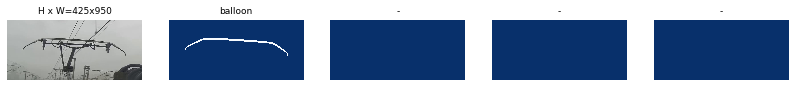

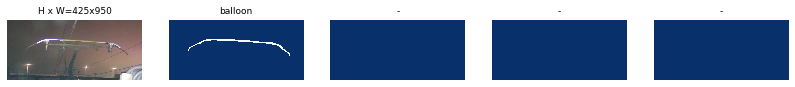

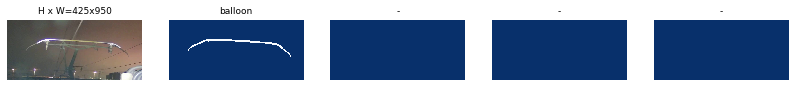

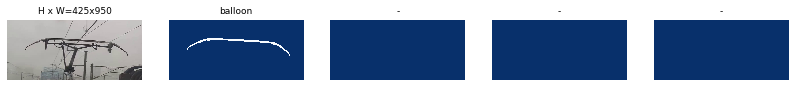

In [9]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

image_id  54 ./train/280 (2).jpg
image                    shape: (425, 950, 3)         min:   22.00000  max:  255.00000  uint8
mask                     shape: (425, 950, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  131.00000  max:  855.00000  int32


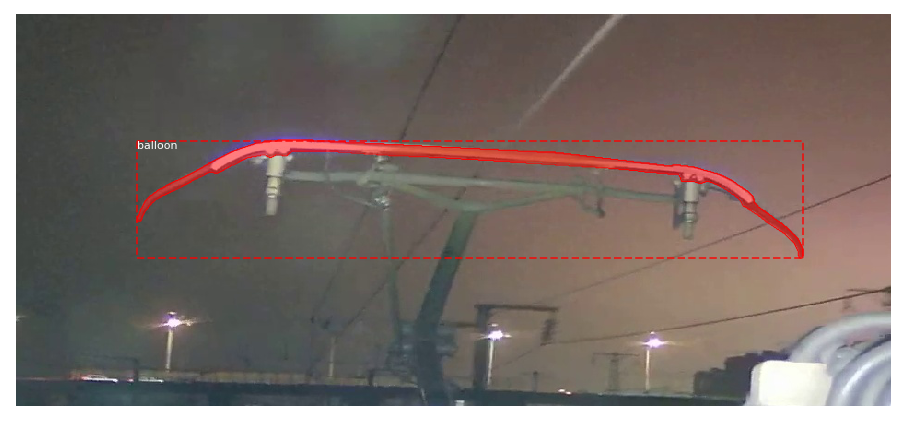

In [10]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Resize Images


image_id:  57 ./train/290.jpg
Original shape:  (425, 950, 3)
image                    shape: (960, 960, 3)         min:    0.00000  max:  227.00000  uint8
mask                     shape: (960, 960, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  127.00000  max:  861.00000  int32


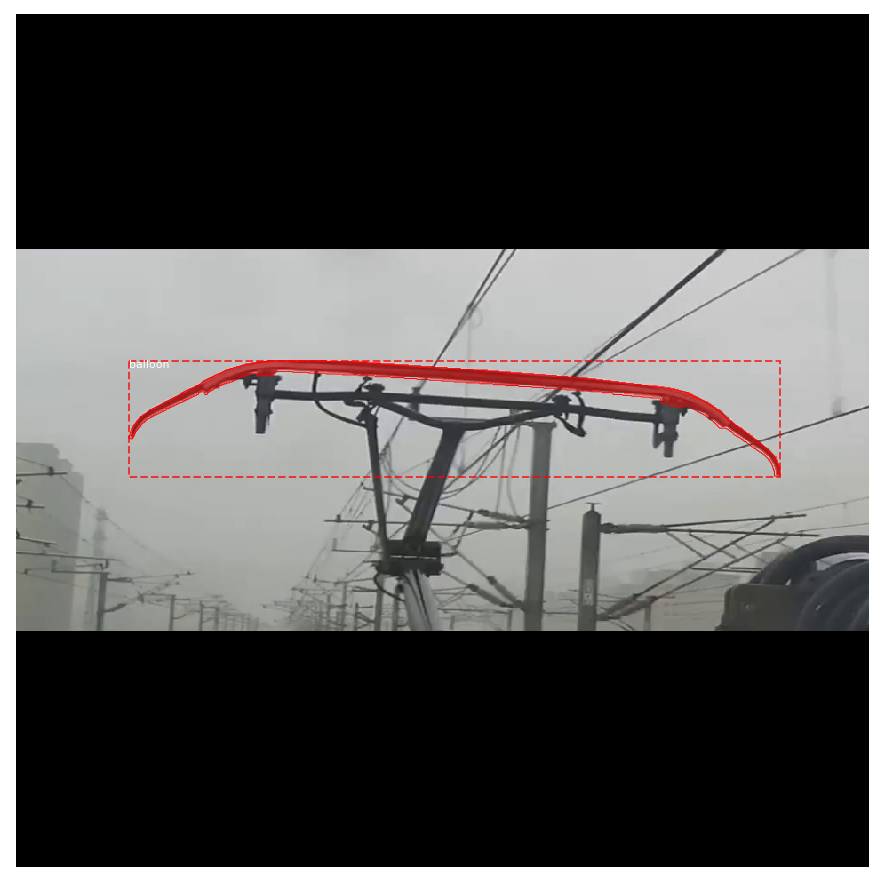

In [11]:
# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Mini Masks


image                    shape: (960, 960, 3)         min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max:  960.00000  float64
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  132.00000  max:  864.00000  int32
mask                     shape: (960, 960, 1)         min:    0.00000  max:    1.00000  bool


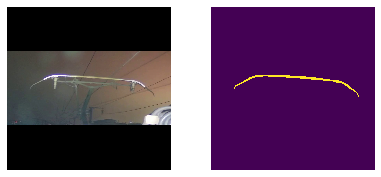

In [12]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

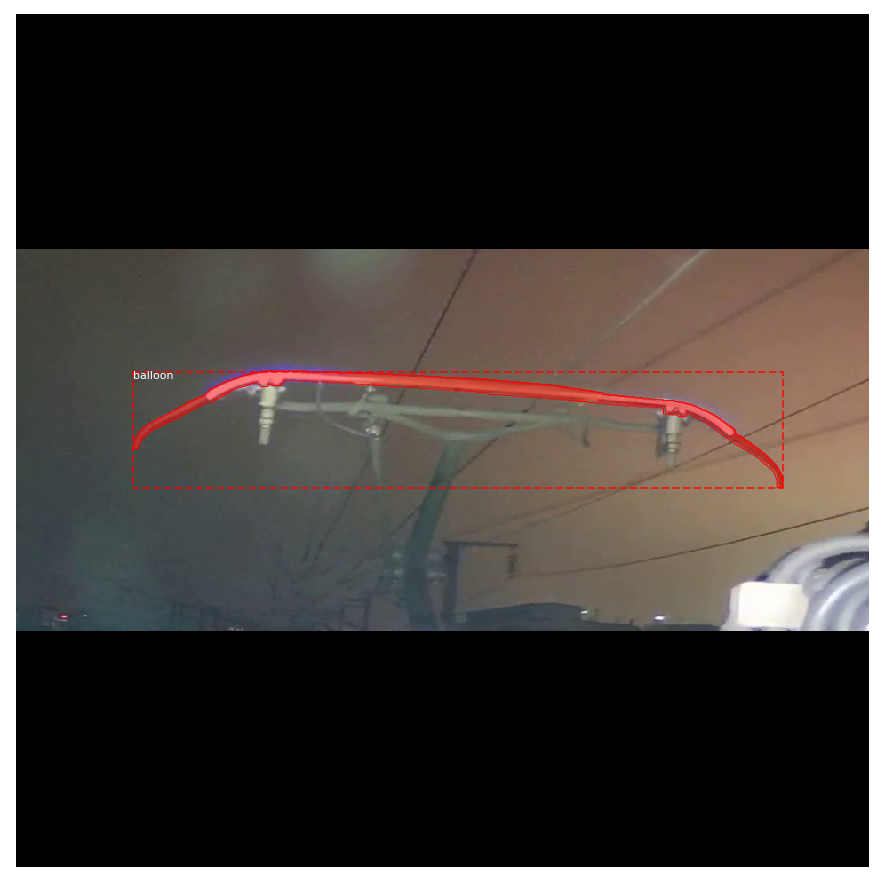

In [13]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

mask                     shape: (112, 224, 1)         min:    0.00000  max:    1.00000  bool



mask                     shape: (112, 224, 1)         min:    0.00000  max:    1.00000  bool


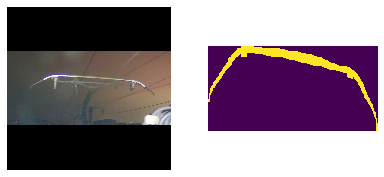

In [14]:
# Add augmentation and mask resizing.
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augment=False, use_mini_mask=True)
log("mask", mask)

#import tensorflow as tf

from keras.layers import *
from keras.models import *


model_resize = Sequential()
model_resize.add(MaxPool2D((2, 2), data_format='channels_last', input_shape=(224, 224,1)))
model_resize.add(MaxPool2D((2, 2), data_format='channels_last'))
#model_resize.add(MaxPool2D((2, 2), data_format='channels_last'))
#mask = model_resize.predict(np.array([mask]))[0]
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

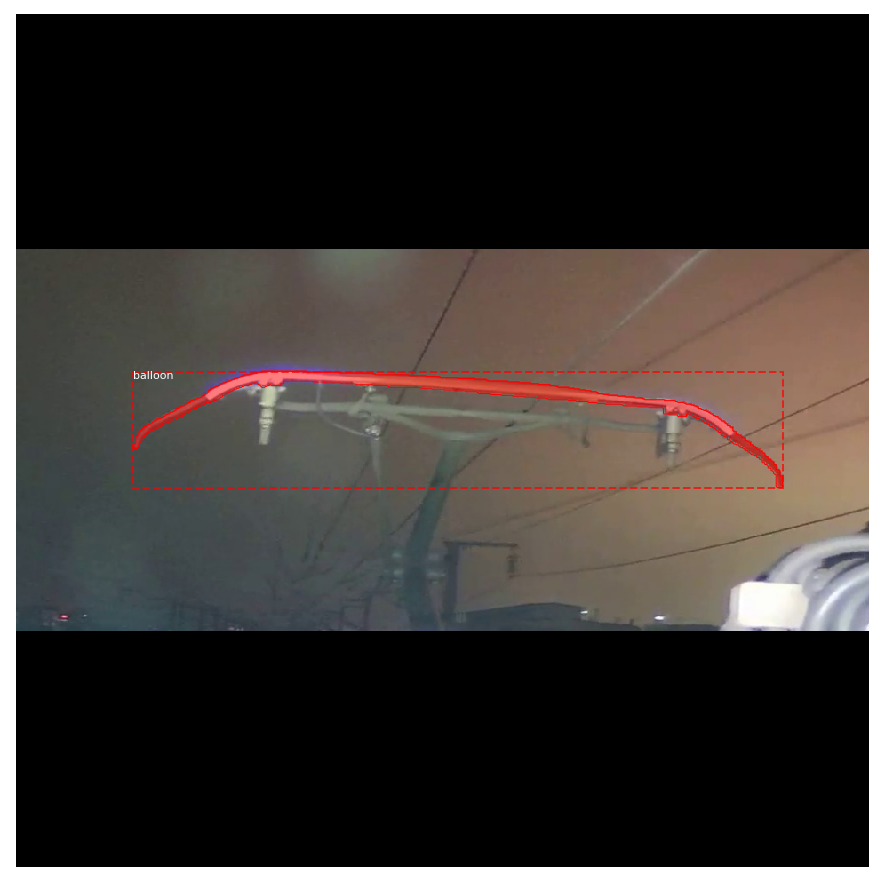

In [15]:
mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

check anchors

In [16]:
# Generate Anchors
backbone_shapes = modellib.compute_backbone_shapes(config, config.IMAGE_SHAPE)
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                          config.RPN_ANCHOR_RATIOS,
                                          backbone_shapes,
                                          config.BACKBONE_STRIDES, 
                                          config.RPN_ANCHOR_STRIDE)

# Print summary of anchors
print (backbone_shapes)
num_levels = len(backbone_shapes)
anchors_per_cell = len(config.RPN_ANCHOR_RATIOS)
print("Count: ", anchors.shape[0])
print("Scales: ", config.RPN_ANCHOR_SCALES)
print("ratios: ", config.RPN_ANCHOR_RATIOS)
print("Anchors per Cell: ", anchors_per_cell)
print("Levels: ", num_levels)
anchors_per_level = []
for l in range(num_levels):
    num_cells = backbone_shapes[l][0] * backbone_shapes[l][1]
    anchors_per_level.append(anchors_per_cell * num_cells // config.RPN_ANCHOR_STRIDE**2)
    print("Anchors in Level {}: {}".format(l, anchors_per_level[l]))

[[240 240]
 [120 120]
 [ 60  60]
 [ 30  30]
 [ 15  15]]
Count:  230175
Scales:  (8, 16, 32, 128, 320)
ratios:  [0.5, 1, 2]
Anchors per Cell:  3
Levels:  5
Anchors in Level 0: 172800
Anchors in Level 1: 43200
Anchors in Level 2: 10800
Anchors in Level 3: 2700
Anchors in Level 4: 675


Level 0. Anchors: 172800  Feature map Shape: [240 240]
Level 1. Anchors:  43200  Feature map Shape: [120 120]
Level 2. Anchors:  10800  Feature map Shape: [60 60]
Level 3. Anchors:   2700  Feature map Shape: [30 30]
Level 4. Anchors:    675  Feature map Shape: [15 15]


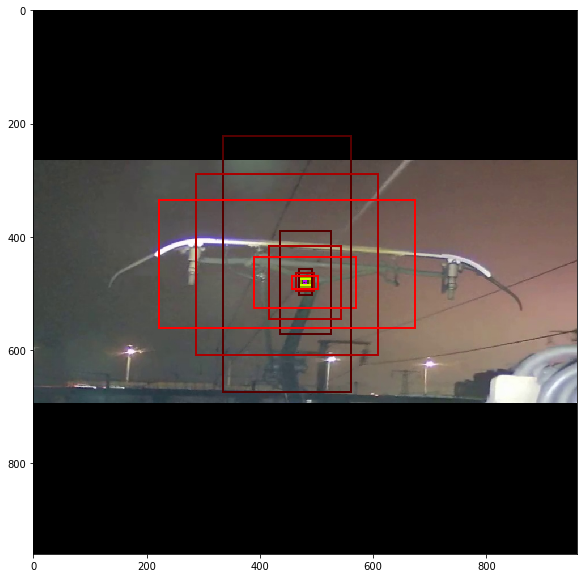

In [17]:
## Visualize anchors of one cell at the center of the feature map of a specific level

# Load and draw random image
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, _, _, _ = modellib.load_image_gt(dataset, config, image_id)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)
levels = len(backbone_shapes)

for level in range(levels):
    colors = visualize.random_colors(levels)
    # Compute the index of the anchors at the center of the image
    level_start = sum(anchors_per_level[:level]) # sum of anchors of previous levels
    level_anchors = anchors[level_start:level_start+anchors_per_level[level]]
    print("Level {}. Anchors: {:6}  Feature map Shape: {}".format(level, level_anchors.shape[0], 
                                                                backbone_shapes[level]))
    center_cell = backbone_shapes[level] // 2
    center_cell_index = (center_cell[0] * backbone_shapes[level][1] + center_cell[1])
    level_center = center_cell_index * anchors_per_cell 
    center_anchor = anchors_per_cell * (
        (center_cell[0] * backbone_shapes[level][1] / config.RPN_ANCHOR_STRIDE**2) \
        + center_cell[1] / config.RPN_ANCHOR_STRIDE)
    level_center = int(center_anchor)

    # Draw anchors. Brightness show the order in the array, dark to bright.
    for i, rect in enumerate(level_anchors[level_center:level_center+anchors_per_cell]):
        y1, x1, y2, x2 = rect
        p = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, facecolor='none',
                              edgecolor=(i+1)*np.array(colors[level]) / anchors_per_cell)
        ax.add_patch(p)

### Data Generator

In [0]:

# Create data generator
random_rois = 2000
g = modellib.data_generator(
    dataset, config, shuffle=True, random_rois=random_rois, 
    batch_size=2,
    detection_targets=True)

In [19]:
# Get Next Image
if random_rois:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_class_ids, gt_boxes, gt_masks, rpn_rois, rois], \
    [mrcnn_class_ids, mrcnn_bbox, mrcnn_mask] = next(g)
    
    log("rois", rois)
    log("mrcnn_class_ids", mrcnn_class_ids)
    log("mrcnn_bbox", mrcnn_bbox)
    log("mrcnn_mask", mrcnn_mask)
else:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_boxes, gt_masks], _ = next(g)
    
log("gt_class_ids", gt_class_ids)
log("gt_boxes", gt_boxes)
log("gt_masks", gt_masks)
log("rpn_match", rpn_match, )
log("rpn_bbox", rpn_bbox)
image_id = image_meta[0][0]
#print ("image_id: ", image_id)
print("image_id: ", image_id, dataset.image_reference(int(image_id)))

# Remove the last dim in mrcnn_class_ids. It's only added
# to satisfy Keras restriction on target shape.
mrcnn_class_ids = mrcnn_class_ids[:,:,0]

rois                     shape: (2, 56, 4)            min:    2.00000  max:  945.00000  int32
mrcnn_class_ids          shape: (2, 56, 1)            min:    0.00000  max:    1.00000  int32
mrcnn_bbox               shape: (2, 56, 2, 4)         min:   -3.02368  max:    3.41734  float32
mrcnn_mask               shape: (2, 56, 56, 56, 2)    min:    0.00000  max:    1.00000  float32
gt_class_ids             shape: (2, 100)              min:    0.00000  max:    1.00000  int32
gt_boxes                 shape: (2, 100, 4)           min:    0.00000  max:  865.00000  int32
gt_masks                 shape: (2, 112, 224, 100)    min:    0.00000  max:    1.00000  bool
rpn_match                shape: (2, 230175, 1)        min:   -1.00000  max:    1.00000  int32
rpn_bbox                 shape: (2, 256, 4)           min:   -2.77106  max:    2.53012  float64
image_id:  59.0 ./train/300.jpg


anchors                  shape: (230175, 4)           min: -226.27417  max: 1122.27417  float64
refined_anchors          shape: (4, 4)                min:  131.00000  max:  862.00000  float32
Positive anchors: 4
Negative anchors: 252
Neutral anchors: 229919
BG                     : 38
balloon                : 18


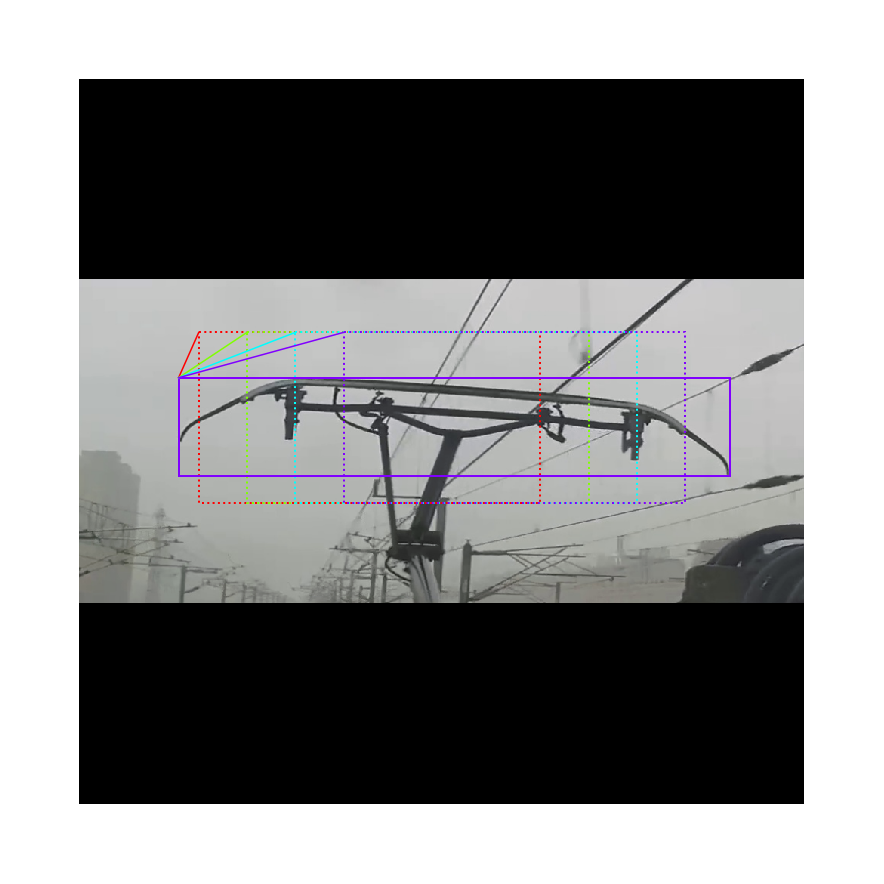

In [20]:
b = 0

# Restore original image (reverse normalization)
sample_image = modellib.unmold_image(normalized_images[b], config)

# Compute anchor shifts.
indices = np.where(rpn_match[b] == 1)[0]
refined_anchors = utils.apply_box_deltas(anchors[indices], rpn_bbox[b, :len(indices)] * config.RPN_BBOX_STD_DEV)
log("anchors", anchors)
log("refined_anchors", refined_anchors)

# Get list of positive anchors
positive_anchor_ids = np.where(rpn_match[b] == 1)[0]
print("Positive anchors: {}".format(len(positive_anchor_ids)))
negative_anchor_ids = np.where(rpn_match[b] == -1)[0]
print("Negative anchors: {}".format(len(negative_anchor_ids)))
neutral_anchor_ids = np.where(rpn_match[b] == 0)[0]
print("Neutral anchors: {}".format(len(neutral_anchor_ids)))

# ROI breakdown by class
for c, n in zip(dataset.class_names, np.bincount(mrcnn_class_ids[b].flatten())):
    if n:
        print("{:23}: {}".format(c[:20], n))

# Show positive anchors
fig, ax = plt.subplots(1, figsize=(16, 16))
visualize.draw_boxes(sample_image, boxes=anchors[positive_anchor_ids], 
                     refined_boxes=refined_anchors, ax=ax)


In [21]:
!ls

gdrive	Mask_RCNN  sample_data	train  val


In [22]:
DEFAULT_LOGS_DIR = 'logs'
DATASET_DIR ='/kaggle/input/railwaypantograph/pantograph_images/'
DATASET_DIR = "./"

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

model = modellib.MaskRCNN(  
    mode='training', 
    config=config, 
    model_dir=DEFAULT_LOGS_DIR
)

model.load_weights(
    COCO_MODEL_PATH, 
    by_name=True, 
    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask", 'mrcnn_class_conv1']
)


... done downloading pretrained model!



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [23]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


# Training dataset.
dataset_train = balloon.BalloonDataset()
dataset_train.load_balloon(DATASET_DIR, 'train')
dataset_train.prepare()

# Validation dataset
dataset_val = balloon.BalloonDataset()
dataset_val.load_balloon(DATASET_DIR, 'val')
dataset_val.prepare()


#dataset_test = balloon.BalloonDataset()
#dataset_test.load_balloon(DATASET_DIR, 'test')
#dataset_test.prepare()


# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_mrcnn_mask_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            )
#                                            min_lr=0.0000001)
#earlystopper = EarlyStopping(monitor='mrcnn_mask_loss', patience=8, verbose=1, restore_best_weights=True)


# Since we're using a very small dataset, and starting from
# COCO trained weights, we don't need to train too long. Also,
# no need to train all layers, just the heads should do it.
print("Training network heads")
model.train(
    dataset_train, dataset_val,
    learning_rate=config.LEARNING_RATE,
    epochs=20,
    layers='heads',
    custom_callbacks=[learning_rate_reduction]
)

Training network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: logs/pantograph20191123T0229/mask_rcnn_pantograph_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
m

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple worker



Epoch 1/20
50/50 [==============================] - 1453s 29s/step - loss: 0.6716 - rpn_class_loss: 0.0039 - rpn_bbox_loss: 0.2597 - mrcnn_class_loss: 0.0444 - mrcnn_bbox_loss: 0.1862 - mrcnn_mask_loss: 0.1774 - val_loss: 0.6856 - val_rpn_class_loss: 0.0055 - val_rpn_bbox_loss: 0.4211 - val_mrcnn_class_loss: 0.0108 - val_mrcnn_bbox_loss: 0.1233 - val_mrcnn_mask_loss: 0.1250
Epoch 2/20
50/50 [==============================] - 1443s 29s/step - loss: 0.1794 - rpn_class_loss: 0.0039 - rpn_bbox_loss: 0.0340 - mrcnn_class_loss: 0.0133 - mrcnn_bbox_loss: 0.0323 - mrcnn_mask_loss: 0.0960 - val_loss: 0.4308 - val_rpn_class_loss: 0.0062 - val_rpn_bbox_loss: 0.2620 - val_mrcnn_class_loss: 0.0133 - val_mrcnn_bbox_loss: 0.0658 - val_mrcnn_mask_loss: 0.0835
Epoch 3/20
50/50 [==============================] - 1406s 28s/step - loss: 0.1191 - rpn_class_loss: 0.0010 - rpn_bbox_loss: 0.0246 - mrcnn_class_loss: 0.0121 - mrcnn_bbox_loss: 0.0181 - mrcnn_mask_loss: 0.0632 - val_loss: 0.2353 - val_rpn_class

Process ForkPoolWorker-7:
Process ForkPoolWorker-78:
Process ForkPoolWorker-9:
Process ForkPoolWorker-1:
Process ForkPoolWorker-79:
Process ForkPoolWorker-60:
Process ForkPoolWorker-74:
Process ForkPoolWorker-51:
Process ForkPoolWorker-44:
Process ForkPoolWorker-71:
Process ForkPoolWorker-76:
Process ForkPoolWorker-35:
Process ForkPoolWorker-36:
Process ForkPoolWorker-80:
Process ForkPoolWorker-77:
Process ForkPoolWorker-43:
Process ForkPoolWorker-62:
Process ForkPoolWorker-61:
Process ForkPoolWorker-53:
Process ForkPoolWorker-69:
Process ForkPoolWorker-75:
Process ForkPoolWorker-66:
Process ForkPoolWorker-70:
Process ForkPoolWorker-3:
Process ForkPoolWorker-56:
Process ForkPoolWorker-50:
Process ForkPoolWorker-63:
Process ForkPoolWorker-37:
Process ForkPoolWorker-42:
Process ForkPoolWorker-68:
Process ForkPoolWorker-20:
Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Process ForkPoolWorker-49:
Process ForkPoolWorker-64:
Process ForkPoolWorker-5:
Process ForkPoolWorker-54:
Process 

KeyboardInterrupt: ignored

In [0]:
class InferenceConfig(PantographConfig):
#class InferenceConfig(balloon.BalloonConfig)
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
config = InferenceConfig()

Note: Please make sure Keras <= 2.2.5 otherwise there is following error:
> AttributeError: 'Model' object has no attribute 'metrics_tensors'

In [25]:
# Recreate the model in inference mode
model = modellib.MaskRCNN(
    mode="inference", 
    config=config,
    model_dir=DEFAULT_LOGS_DIR
)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  logs/pantograph20191123T0229/mask_rcnn_pantograph_0013.h5
Re-starting from epoch 13


In [0]:
def get_ax(rows=1, cols=1, size=7):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [0]:
def predict_and_plot_differences(dataset, img_id):
    original_image, image_meta, gt_class_id, gt_box, gt_mask =\
        modellib.load_image_gt(dataset, config, 
                               img_id, use_mini_mask=False)

    results = model.detect([original_image], verbose=0)
    r = results[0]

    visualize.display_differences(
        original_image,
        gt_box, gt_class_id, gt_mask,
        r['rois'], r['class_ids'], r['scores'], r['masks'],
        class_names = ['tumor'], title="", ax=get_ax(),
        show_mask=True, show_box=True)

## Result

In [0]:
def display_image(dataset, ind):
    plt.figure(figsize=(5,5))
    plt.imshow(dataset.load_image(ind))
    plt.xticks([])
    plt.yticks([])
    plt.title('Original Image')
    plt.show()

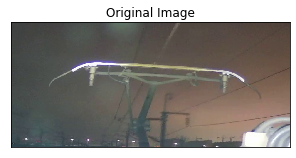

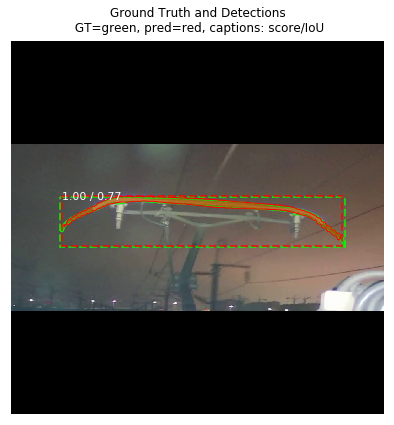

In [29]:
ind = 0
display_image(dataset_val, ind)
predict_and_plot_differences(dataset_val, ind)

In [0]:
ind = 2
display_image(dataset_val, ind)
predict_and_plot_differences(dataset_val, ind)

## make the background gray

In [0]:
def color_splash(image, mask):
    """Apply color splash effect.
    image: RGB image [height, width, 3]
    mask: instance segmentation mask [height, width, instance count]
    Returns result image.
    """
    # Make a grayscale copy of the image. The grayscale copy still
    # has 3 RGB channels, though.
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
    # We're treating all instances as one, so collapse the mask into one layer
    mask = (np.sum(mask, -1, keepdims=True) >= 1)
    
    print(mask.shape, image.shape)
    image = np.ones((image.shape[0], image.shape[1]))*255
    gray = np.zeros((gray.shape[0], gray.shape[1]))
    
    # Copy color pixels from the original color image where mask is set
    if mask.shape[0] > 0:
        #splash = np.where(mask.reshape, image, gray).astype(np.uint8)
        splash = np.where(mask.reshape((mask.shape[0], mask.shape[1])), image, gray).astype(np.uint8)
    else:
        splash = gray
    return splash

In [0]:
from matplotlib import image

def detect_and_color_splash(model, image_path=None, video_path=None):
    assert image_path or video_path

    # Image or video?
    if image_path:
        # Run model detection and generate the color splash effect
        print("Running on {}".format(image_path))
        # Read image
        image = skimage.io.imread(image_path)
        # Detect objects
        r = model.detect([image], verbose=1)[0]
        # Color splash
        splash = color_splash(image, r['masks'])
        # Save output
        file_name = "splash_{:%Y%m%dT%H%M%S}.png".format(datetime.datetime.now())
        skimage.io.imsave(file_name, splash)
        #plt.imshow(image.imread(file_name))
        skimage.io.imshow(file_name) 
        skimage.io.show()
    elif video_path:
        import cv2
        # Video capture
        vcapture = cv2.VideoCapture(video_path)
        width = int(vcapture.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(vcapture.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = vcapture.get(cv2.CAP_PROP_FPS)

        # Define codec and create video writer
        file_name = "splash_{:%Y%m%dT%H%M%S}.avi".format(datetime.datetime.now())
        vwriter = cv2.VideoWriter(file_name,
                                  cv2.VideoWriter_fourcc(*'MJPG'),
                                  fps, (width, height))

        count = 0
        success = True
        while success:
            print("frame: ", count)
            # Read next image
            success, image = vcapture.read()
            if success:
                # OpenCV returns images as BGR, convert to RGB
                image = image[..., ::-1]
                # Detect objects
                r = model.detect([image], verbose=0)[0]
                # Color splash
                splash = color_splash(image, r['masks'])
                # RGB -> BGR to save image to video
                splash = splash[..., ::-1]
                # Add image to video writer
                vwriter.write(splash)
                count += 1
        vwriter.release()
    print("Saved to ", file_name)


Running on ./val/780.jpg
Processing 1 images
image                    shape: (425, 950, 3)         min:    0.00000  max:  235.00000  uint8
molded_images            shape: (1, 960, 960, 3)      min: -123.70000  max:  123.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  960.00000  float64
anchors                  shape: (1, 230175, 4)        min:   -0.23595  max:    1.16921  float32
(425, 950, 1) (425, 950, 3)


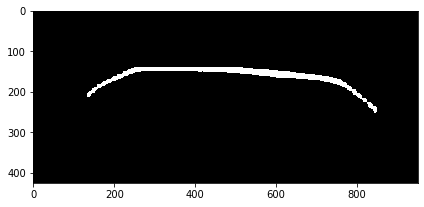

Saved to  splash_20191123T075606.png


In [35]:
import datetime
import skimage.draw
detect_and_color_splash(model, image_path='./val/780.jpg', video_path=None)

TO TRY:
ANCHOR ratio and scale parameter

use imagenet instead of coco

add more sample

augment


注意跟踪：
1. https://github.com/matterport/Mask_RCNN/issues/853
2. https://github.com/matterport/Mask_RCNN/issues/896
3. https://github.com/matterport/Mask_RCNN/issues/570
4. https://stackoverflow.com/questions/55389081/mask-rcnn-can-not-correctly-mask-long-thin-objects-like-animal-tail
